In [1]:
import numpy as np
from env.mu_env import BS
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def cal_REST(R_SINR):
    duty_factor = 0.1 # Pulse Duration Interval / Pulse Repetition Interval
    T = 1e-6 # 1us
    sigma = 0.01 # Processing Noise
    B_s = 10e+6
    R_=duty_factor/(2*T) * np.log2(1 + 4*(np.pi**2)*(sigma**2)*(B_s**2)*T*R_SINR)
    return R_
_REST = []
for Sinr in np.linspace(-10,40):
    R_SINR = np.power(10,Sinr/10)
    R_ = cal_REST(R_SINR)
    _REST.append(R_)

In [2]:
np.random.seed(777)
env = BS(N_t=4, N_c=1, N_s=1)
env.B_c = 10e+6 # Hz Communication Bandwidth
env.B_s = 10e+6 # Hz Sensing Bandwidth
# env._power_allocation(Pc_s = [20,20,20,20,20], Ps_s = [10,10,10])
# env._power_allocation(Pc_s = [5,5,5,10,10], Ps_s = [10,20,15])
# # env._power_allocation(Pc_s = [10,10,10,10,10], Ps_s = [10,10,10])
sum_REST = []
for SP in np.linspace(1,20,40):
    env._power_allocation(Pc_s = [10], Ps_s = [SP])
    R_c, R_est = env.get_performance(True)
    sum_REST.append(np.sum(R_est))
# print(np.sum(R_c),np.sum(R_est))
print(sum_REST)

sum_RC = []
for CP in np.linspace(1,20,40):
    env._power_allocation(Pc_s = [CP], Ps_s = [10])
    R_c, R_est = env.get_performance(True)
    sum_RC.append(np.sum(R_c))
# print(np.sum(R_c),np.sum(R_est))
print(sum_RC)

C Sinr (dB) [22.80505619]
S Sinr (dB) [20.59664303]
R_c [34305027.232453]
R_est [1078108.6289909189]
C Sinr (dB) [22.80505619]
S Sinr (dB) [24.53919517]
R_c [34305027.232453]
R_est [1106548.1235265248]
C Sinr (dB) [22.80505619]
S Sinr (dB) [27.35935646]
R_c [34305027.232453]
R_est [1126891.2831981338]
C Sinr (dB) [22.80505619]
S Sinr (dB) [29.55659695]
R_c [34305027.232453]
R_est [1142741.0206534658]
C Sinr (dB) [22.80505619]
S Sinr (dB) [31.35693177]
R_c [34305027.232453]
R_est [1155727.6896987907]
C Sinr (dB) [22.80505619]
S Sinr (dB) [32.88205369]
R_c [34305027.232453]
R_est [1166729.1177155478]
C Sinr (dB) [22.80505619]
S Sinr (dB) [34.20505614]
R_c [34305027.232453]
R_est [1176272.5622549406]
C Sinr (dB) [22.80505619]
S Sinr (dB) [35.37329734]
R_c [34305027.232453]
R_est [1184699.6404657403]
C Sinr (dB) [22.80505619]
S Sinr (dB) [36.41922258]
R_c [34305027.232453]
R_est [1192244.395769289]
C Sinr (dB) [22.80505619]
S Sinr (dB) [37.36603513]
R_c [34305027.232453]
R_est [1199074.204

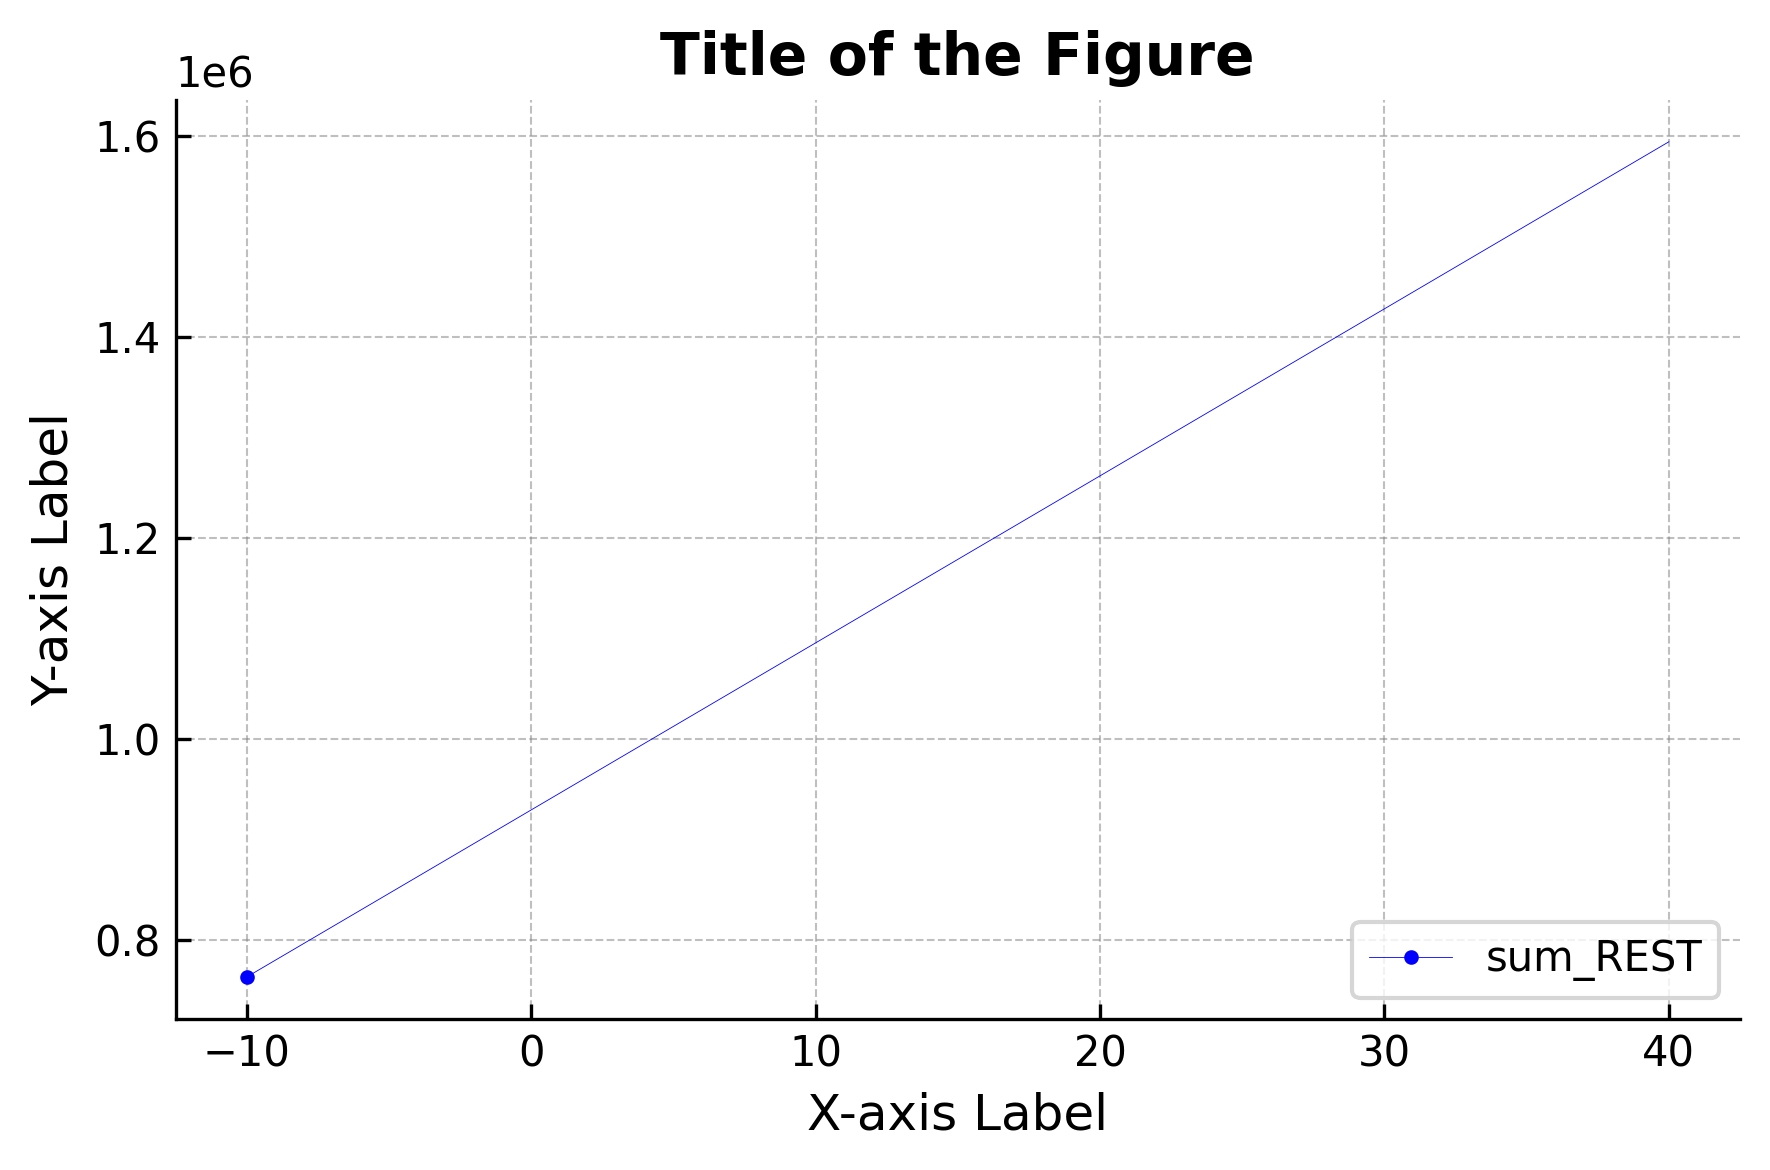

In [21]:
# Generate sample data
x = np.linspace(-10,40)
# x = np.linspace(1, 20, 40)
# y1 = np.array(sum_REST)
y1 = np.array(_REST)
# y1 = np.array(sum_RC)
# y1 = np.array(sum_RC)

# Create figure
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Set plot style with line and markers
ax.plot(x, y1, label='sum_REST', color='b', linewidth=0.2, marker='.', markersize=5, linestyle='-', markevery=500)
# Set axis labels
ax.set_xlabel('X-axis Label', fontsize=12)
ax.set_ylabel('Y-axis Label', fontsize=12)

# Set title
ax.set_title('Title of the Figure', fontsize=14, fontweight='bold')

# Set legend
ax.legend(loc='lower right', fontsize=10, frameon=True)

# Set tick parameters
ax.tick_params(axis='both', which='both', direction='in', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set grid
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Set figure layout
fig.tight_layout()

# Show figure
plt.show()

In [3]:
np.random.seed(777)
env = BS(N_t=16, N_c=5, N_s=3)
env.B_c = 10e+6 # Hz Communication Bandwidth
env.B_s = 10e+6 # Hz Sensing Bandwidth
# env._power_allocation(Pc_s = [20,20,20,20,20], Ps_s = [10,10,10])
# env._power_allocation(Pc_s = [5,5,5,10,10], Ps_s = [10,20,15])
# # env._power_allocation(Pc_s = [10,10,10,10,10], Ps_s = [10,10,10])

# env._power_allocation(Pc_s = [10,10,10,10,10], Ps_s = [10,10,10])
# R_c, R_est = env.get_performance(True)
# print(np.sum(R_c),np.sum(R_est))

# env.B_c = 10e+6 # Hz Communication Bandwidth
# env.B_s = 10e+6 # Hz Sensing Bandwidth
# env._power_allocation(Pc_s = [10,10,10,10,10], Ps_s = [10,10,10])
# R_c, R_est = env.get_performance(True)
# print(np.sum(R_c),np.sum(R_est))

reward = []
bl_reward = []
for i in range(0,40000):
    rio = np.random.rand(4)
    rio = (rio)/np.sum(rio)
    ns,r,d,_,_,bl_r = env.step(pa_ratio=rio,freeze=True)
    reward.append(r)
    bl_reward.append(bl_r)

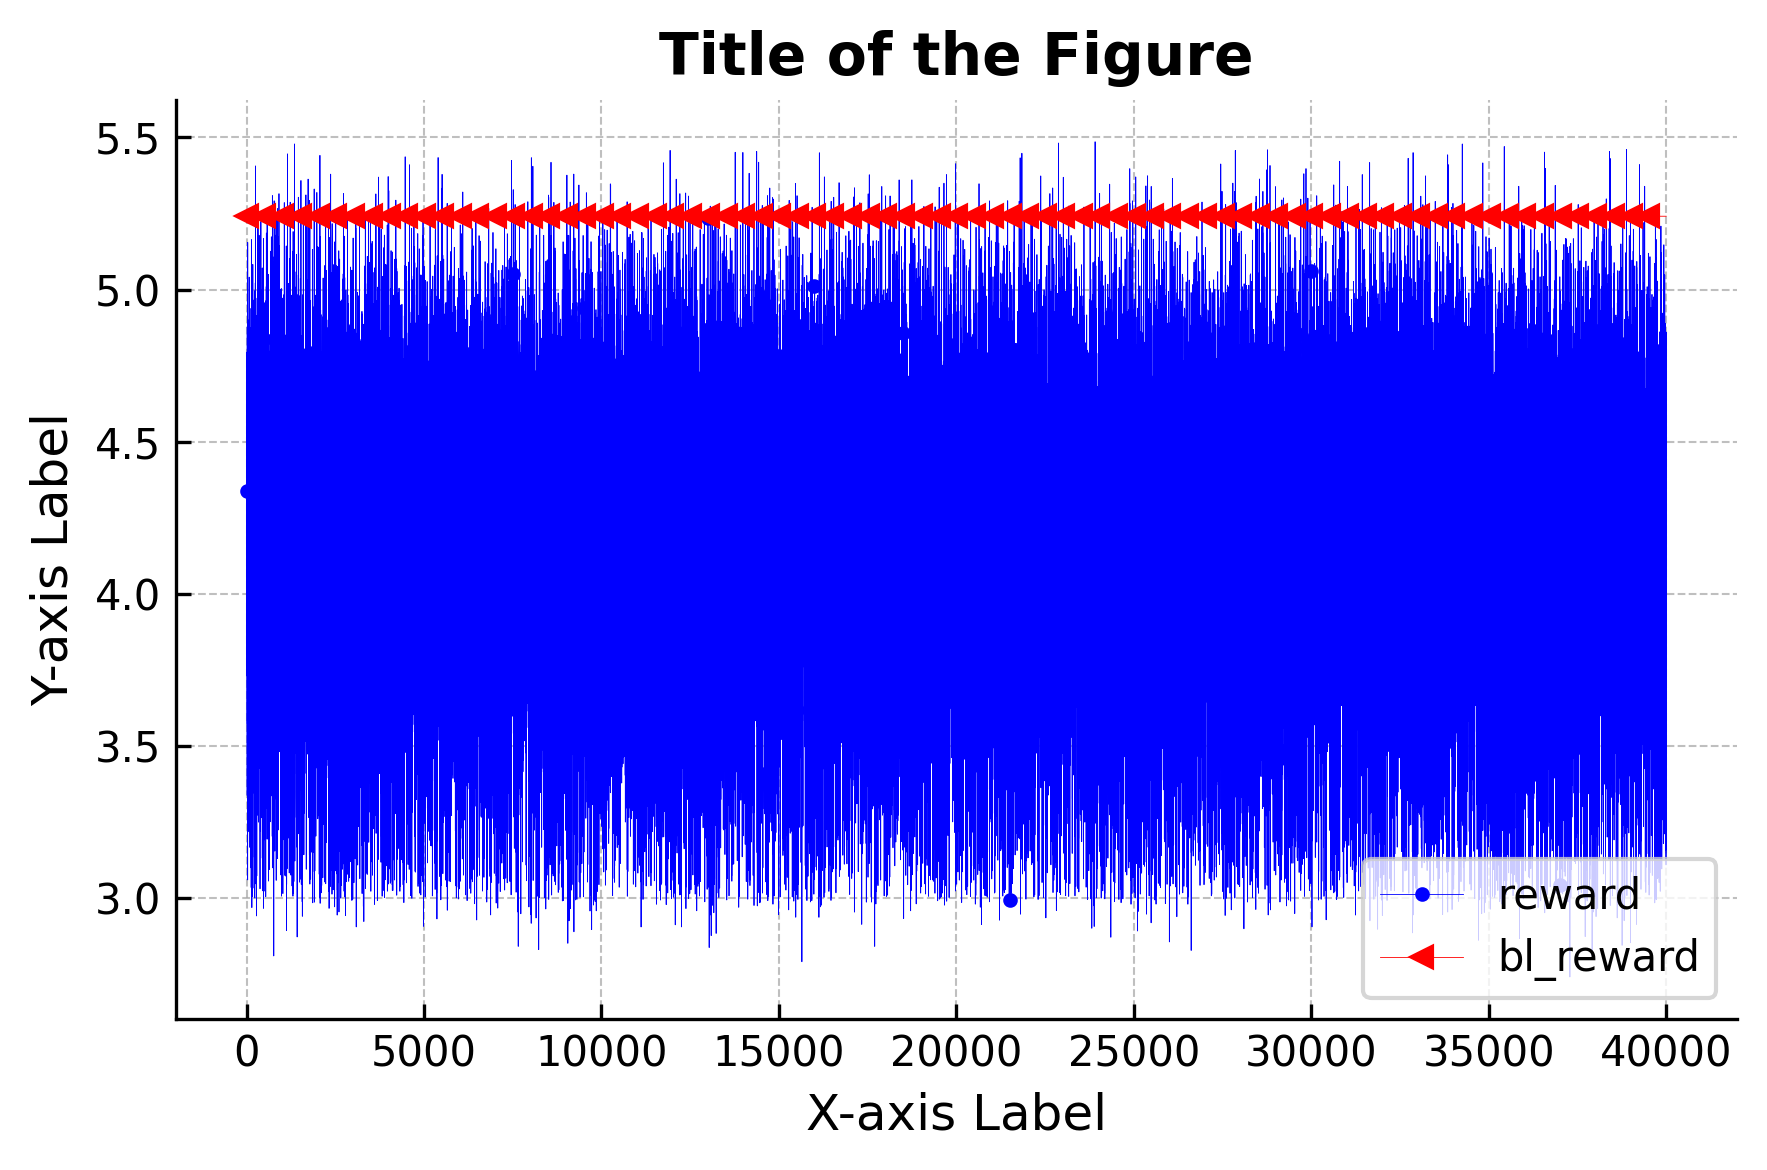

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
x = np.linspace(0, 40000, 40000)
y1 = np.array(reward)
y2 = np.array(bl_reward)


# Create figure
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Set plot style with line and markers
ax.plot(x, y1, label='reward', color='b', linewidth=0.2, marker='.', markersize=5, linestyle='-', markevery=500)
ax.plot(x, y2, label='bl_reward', color='r', linewidth=0.2, marker='<', markersize=5, linestyle='-', markevery=500)
# Set axis labels
ax.set_xlabel('X-axis Label', fontsize=12)
ax.set_ylabel('Y-axis Label', fontsize=12)

# Set title
ax.set_title('Title of the Figure', fontsize=14, fontweight='bold')

# Set legend
ax.legend(loc='lower right', fontsize=10, frameon=True)

# Set tick parameters
ax.tick_params(axis='both', which='both', direction='in', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set grid
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Set figure layout
fig.tight_layout()

# Show figure
plt.show()


In [8]:
x = np.linspace(0, 40000, 40000)
x.shape

(40000,)